In [1]:
import pandas as pd
import numpy as np

Import the “NHL_Team.csv” data file and name the dataframe as “NHL_Team” in Jupyter Notebook.
a) Delete the following variables: “Unnamed:0”, “abbr”, “tname”, “lname”, and “sname”.
b) Rename the variable “name” to “team_name”.

In [2]:
NHL_Team = pd.read_csv('NHL_team.csv')

varsToDelete = ['Unnamed: 0', 'abbr', 'tname', 'lname', 'sname']
NHL_Team = NHL_Team.drop(varsToDelete, axis=1)

NHL_Team.rename(columns={'name':'team_name'}, inplace=True)
#NHL_Team.info()

2.	Import the “NHL_competition.csv” data file and name the dataframe as “NHL_Competition” in Jupyter Notebook. a) Delete the following variables: “Unnamed: 0”, “tz”, “start”, and “end” b) Rename the variable “name” to “competition_name”.

In [3]:
NHL_Competition = pd.read_csv('NHL_competition.csv')

varsToDelete = ['Unnamed: 0', 'tz', 'start', 'end']
NHL_Competition.drop(varsToDelete, axis=1, inplace=True)

NHL_Competition.rename(columns={'name':'competition_name'}, inplace=True)
#NHL_Competition.info()

3.	Import the “NHL_game.csv” data file and name the dataframe as “NHL_Game” in Jupyter Notebook. a) Delete the following variables: “X”, “period”, and “status”.

In [4]:
NHL_Game = pd.read_csv('NHL_game.csv')

varsToDelete = ['X', 'period', 'status']
NHL_Game.drop(varsToDelete, axis=1, inplace=True)

#NHL_Game.info()

4.	Merge the dataframe “NHL_Team” into the dataframe “NHL_Game” by “tid.” Continue to name the merged dataframe as “NHL_Game.”

In [5]:
NHL_Game = pd.merge(NHL_Team, NHL_Game, on='tid')
#NHL_Game.info()

5.	Merge the dataframe “NHL_Competition” into the dataframe “NHL_Game” by “comp_id.” Continue to name the merged dataframe as “NHL_Game.”

In [6]:
NHL_Game = pd.merge(NHL_Competition, NHL_Game, on='comp_id')
#NHL_Game.info()

6.	In the merged “NHL_Game” dataframe, create a variable “hgd” to indicate the goal difference between home and away score (hscore – ascore) and delete observations with missing value in the variable “hgd”.

In [7]:
NHL_Game['hgd'] = NHL_Game['hscore'] - NHL_Game['ascore']
NHL_Game.dropna(axis=0, subset='hgd', inplace=True)
#NHL_Game.head()

7.	Drop all observations with missing values, if there is still any, from the “NHL_Game” dataframe.

In [8]:
NHL_Game.dropna(how='any', inplace=True)
#NHL_Game

Question I/1
What are the number of observations and the number of variables in the NHL_Game dataframe after performing the first 7 steps of the Assignment?

A.	18,946; 24
B.	18506; 13
C.	18,946; 13
D.	18506; 24


In [9]:
numOfObservations = len(NHL_Game)
numOfVars = len(NHL_Game.columns)

print("Number of observations are ", numOfObservations, " and number of variables are ", numOfVars)

Number of observations are  18506  and number of variables are  13


8.	Convert the type of the “date” variable from “object” to “datetime.”

In [10]:
NHL_Game['date'] = pd.to_datetime(NHL_Game['date'])

Question I/2
What is the time range of the NHL_Game dataframe after you performed step 8?

A.	2015-03-08 to 2018-06-08
B.	2010-10-07 to 2018-06-14
C.	2010-10-07 to 2015-03-08
D.	2010-10-07 to 2018-06-08


In [11]:
NHL_Game.sort_values(by='date', inplace=True)
timeMin = NHL_Game['date'].min()
timeMax = NHL_Game['date'].max()
print("Date range is between ", timeMin, " and ", timeMax)
#NHL_Game['date']

Date range is between  2010-10-07 00:00:00  and  2018-06-08 00:00:00


9.	Sort the NHL games by “date” and show the first 15 observations.

In [12]:
NHL_Game.sort_values('date', inplace=True)
#NHL_Game.head(15)

Question I/3
After performing step 9, what are the values of the “gid” variable of the fifth, tenth, and fifteenth observations by date in ascending order in the prepared NHL_Game dataframe?

A.	5666, 5662, 5668
B.	2730, 2725, 2720
C.	2725, 2720, 2716
D.	5662, 5668, 5683  (For me it was 5662,5683,5679)


In [13]:
print(NHL_Game.iloc[4]['gid'], NHL_Game.iloc[9]['gid'], NHL_Game.iloc[14]['gid'])
NHL_Game

5662 5674 5670


,comp_id,year,type,competition_name,tid,team_name,tricode,gid,date,ascore,hscore,home_away,hgd
15183,5662,2010,2,2010 NHL Regular Season,35,Minnesota Wild,MIN,5666,2010-10-07,4.0,3.0,home,-1.0
14163,5662,2010,2,2010 NHL Regular Season,14,Philadelphia Flyers,PHI,5664,2010-10-07,3.0,2.0,away,-1.0
15794,5662,2010,2,2010 NHL Regular Season,66,Carolina Hurricanes,CAR,5666,2010-10-07,4.0,3.0,away,-1.0
13955,5662,2010,2,2010 NHL Regular Season,8,Pittsburgh Penguins,PIT,5664,2010-10-07,3.0,2.0,home,-1.0
13611,5662,2010,2,2010 NHL Regular Season,2,Montréal Canadiens,MTL,5662,2010-10-07,2.0,3.0,away,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5229,2541,2017,3,2017 NHL Playoff,5,Washington Capitals,WSH,2725,2018-06-03,1.0,3.0,home,2.0
5367,2541,2017,3,2017 NHL Playoff,59,Vegas Golden Knights,VGK,2727,2018-06-05,2.0,6.0,away,4.0
5228,2541,2017,3,2017 NHL Playoff,5,Washington Capitals,WSH,2727,2018-06-05,2.0,6.0,home,4.0
5383,2541,2017,3,2017 NHL Playoff,59,Vegas Golden Knights,VGK,2730,2018-06-08,4.0,3.0,home,-1.0


10.	Create two dataframes that separate the “NHL_Game” dataframe by home and away games. Name them “NHL_Home” and “NHL_Away”, respectively. a) Rename variables: i) For away games, rename “ascore” to “goals_for”; rename “hscore” to “goals_against” ii) For home games, rename “hscore” to “goals_for”; rename “ascore” to “goals_against” b) Create a “win” variable that equals to 1 if the team won the game; 0 if the team lost the game; and 0.5 if it was a draw.

In [14]:
NHL_Home = NHL_Game[NHL_Game['home_away'] == 'home']
NHL_Home.rename(columns={'hscore':'goals_for', 'ascore':'goals_against'}, inplace=True)
NHL_Home['win'] = np.where(NHL_Home['goals_for'] > NHL_Home['goals_against'], 1, np.where(NHL_Home['goals_for'] < NHL_Home['goals_against'], 0, 0.5))

NHL_Away = NHL_Game[NHL_Game['home_away'] == 'away']
NHL_Away.rename(columns={'hscore':'goals_against', 'ascore':'goals_for'}, inplace=True)
NHL_Away['win'] = np.where(NHL_Away['goals_for'] > NHL_Away['goals_against'], 1, np.where(NHL_Away['goals_for'] < NHL_Away['goals_against'], 0, 0.5))


<ipython-input-14-d18d19f1a567>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NHL_Home.rename(columns={'hscore':'goals_for', 'ascore':'goals_against'}, inplace=True)
<ipython-input-14-d18d19f1a567>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NHL_Home['win'] = np.where(NHL_Home['goals_for'] > NHL_Home['goals_against'], 1, np.where(NHL_Home['goals_for'] < NHL_Home['goals_against'], 0, 0.5))
<ipython-input-14-d18d19f1a567>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

11.	Append the “NHL_Home” and “NHL_Away” dataframes to be the new “NHL_Game” dataframe.

In [15]:
NHL_Game = pd.concat([NHL_Home, NHL_Away])
NHL_Game

,comp_id,year,type,competition_name,tid,team_name,tricode,gid,date,goals_against,goals_for,home_away,hgd,win
15183,5662,2010,2,2010 NHL Regular Season,35,Minnesota Wild,MIN,5666,2010-10-07,4.0,3.0,home,-1.0,0.0
13955,5662,2010,2,2010 NHL Regular Season,8,Pittsburgh Penguins,PIT,5664,2010-10-07,3.0,2.0,home,-1.0,0.0
13564,5662,2010,2,2010 NHL Regular Season,1,Toronto Maple Leafs,TOR,5662,2010-10-07,2.0,3.0,home,1.0,1.0
15926,5662,2010,2,2010 NHL Regular Season,11366,Atlanta Thrashers,ATL,5683,2010-10-08,2.0,4.0,home,2.0,1.0
15843,5662,2010,2,2010 NHL Regular Season,66,Carolina Hurricanes,CAR,5677,2010-10-08,1.0,2.0,home,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5217,2541,2017,3,2017 NHL Playoff,5,Washington Capitals,WSH,2720,2018-05-29,6.0,4.0,away,2.0,0.0
5214,2541,2017,3,2017 NHL Playoff,5,Washington Capitals,WSH,2723,2018-05-31,2.0,3.0,away,-1.0,1.0
5369,2541,2017,3,2017 NHL Playoff,59,Vegas Golden Knights,VGK,2725,2018-06-03,3.0,1.0,away,2.0,0.0
5367,2541,2017,3,2017 NHL Playoff,59,Vegas Golden Knights,VGK,2727,2018-06-05,6.0,2.0,away,4.0,0.0


12.	Generate a team level dataframe that aggregates the total number of games won, the total number of “goals_for” and “goals_against” for each team in each competition (i.e. grouped by tid, competition_name and type). Name this new dataframe “NHL_Team_Stats”. Make sure to convert the indexes of the new dataframe back as  variables.

In [16]:
NHL_Team_Stats = NHL_Game
NHL_Team_Stats = NHL_Team_Stats.groupby(['tid', 'competition_name', 'type', 'tricode'],
                                  sort=False)['win', 'goals_for',
                                              'goals_against'].sum().reset_index()
NHL_Team_Stats.rename(columns={'win':'TotalWin', 'goals_for':'TotalGoalsFor',
                               'goals_against':'TotalGoalsAgainst'}, inplace=True)
#NHL_Team_Stats

<ipython-input-16-feead104a605>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  NHL_Team_Stats = NHL_Team_Stats.groupby(['tid', 'competition_name', 'type', 'tricode'],


13.	Create a dataframe “NHL_Game_Count” that include the total number of games played by each team in each competition (i.e. grouped by tid, competition_name and type). Name this new variable in the dataframe “game_count”.

In [17]:
NHL_Game_Count = NHL_Game.groupby(['tid', 'competition_name', 'type', 'team_name', 'year'],
                                  sort=False)['date'].count().reset_index(name='game_count')
#NHL_Game_Count.sort_values(by='tid')

14.	Merge dataframes. a) Merge the “NHL_Game_Count” dataframe into the “NHL_Team_Stats” dataframe by “tid”, “competition_name”, and “type”. Continue to name the merged dataframe “NHL_Team_Stats”. b) Merge the “NHL_Team” dataframe into the “NHL_Team_Stats” dataframe by “tid”. Continue to name the merged dataframe “NHL_Team_Stats”.

In [18]:
NHL_Team_Stats = pd.merge(NHL_Game_Count, NHL_Team_Stats, on=['tid', 'competition_name', 'type'])
NHL_Team_Stats

,tid,competition_name,type,team_name,year,game_count,tricode,TotalWin,TotalGoalsFor,TotalGoalsAgainst
0,35,2010 NHL Regular Season,2,Minnesota Wild,2010,80,MIN,38.0,208.0,237.0
1,8,2010 NHL Regular Season,2,Pittsburgh Penguins,2010,81,PIT,49.0,242.0,195.0
2,1,2010 NHL Regular Season,2,Toronto Maple Leafs,2010,82,TOR,36.0,223.0,259.0
3,11366,2010 NHL Regular Season,2,Atlanta Thrashers,2010,79,ATL,34.0,223.0,263.0
4,66,2010 NHL Regular Season,2,Carolina Hurricanes,2010,82,CAR,40.0,239.0,242.0
...,...,...,...,...,...,...,...,...,...,...
364,1,2017 NHL Playoff,3,Toronto Maple Leafs,2017,7,TOR,3.0,20.0,28.0
365,29,2017 NHL Playoff,3,New Jersey Devils,2017,5,NJD,1.0,12.0,18.0
366,16,2017 NHL Playoff,3,San Jose Sharks,2017,10,SJS,6.0,30.0,26.0
367,52,2017 NHL Playoff,3,Columbus Blue Jackets,2017,6,CBJ,2.0,18.0,24.0


15.	Import the “pp.pk.ppgf.csv” data file and name the dataframe as “NHL_PPPK” in Jupyter Notebook. Merge the “NHL_PPPK” dataframe into the “NHL_Team_Stats” dataframe by “tricode” and “competition_name”.

In [19]:
NHL_PPPK = pd.read_csv('pp.pk.ppgf.csv')
NHL_PPPK
NHL_Team_Stats = pd.merge(NHL_Team_Stats, NHL_PPPK,
                          on=['tricode', 'competition_name'])
NHL_Team_Stats

,tid,competition_name,type,team_name,year,game_count,tricode,TotalWin,TotalGoalsFor,TotalGoalsAgainst,pp,pk,ppgf
0,35,2010 NHL Regular Season,2,Minnesota Wild,2010,80,MIN,38.0,208.0,237.0,375,359,72.0
1,8,2010 NHL Regular Season,2,Pittsburgh Penguins,2010,81,PIT,49.0,242.0,195.0,457,444,62.0
2,1,2010 NHL Regular Season,2,Toronto Maple Leafs,2010,82,TOR,36.0,223.0,259.0,368,426,46.0
3,11366,2010 NHL Regular Season,2,Atlanta Thrashers,2010,79,ATL,34.0,223.0,263.0,338,341,35.0
4,66,2010 NHL Regular Season,2,Carolina Hurricanes,2010,82,CAR,40.0,239.0,242.0,338,427,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,1,2017 NHL Playoff,3,Toronto Maple Leafs,2017,7,TOR,3.0,20.0,28.0,26,21,4.0
365,29,2017 NHL Playoff,3,New Jersey Devils,2017,5,NJD,1.0,12.0,18.0,24,24,3.0
366,16,2017 NHL Playoff,3,San Jose Sharks,2017,10,SJS,6.0,30.0,26.0,51,57,11.0
367,52,2017 NHL Playoff,3,Columbus Blue Jackets,2017,6,CBJ,2.0,18.0,24.0,28,26,4.0


16.	Create new variables in the “NHL_Team_Stats” dataframe. a) Winning percentage (“win_pct”)=”win”/ total number of games played b) Average goals for per game (“avg_gf”)=total number of goals for / total number of games played      c) Average goals against per game (“avg_ga”)=total number of goals against / total number of games played

In [20]:
NHL_Team_Stats['win_pct'] = NHL_Team_Stats['TotalWin']/NHL_Team_Stats['game_count']
NHL_Team_Stats['avg_gf'] = NHL_Team_Stats['TotalGoalsFor']/NHL_Team_Stats['game_count']
NHL_Team_Stats['avg_ga'] = NHL_Team_Stats['TotalGoalsAgainst']/NHL_Team_Stats['game_count']

NHL_Team_Stats

,tid,competition_name,type,team_name,year,game_count,tricode,TotalWin,TotalGoalsFor,TotalGoalsAgainst,pp,pk,ppgf,win_pct,avg_gf,avg_ga
0,35,2010 NHL Regular Season,2,Minnesota Wild,2010,80,MIN,38.0,208.0,237.0,375,359,72.0,0.475000,2.600000,2.962500
1,8,2010 NHL Regular Season,2,Pittsburgh Penguins,2010,81,PIT,49.0,242.0,195.0,457,444,62.0,0.604938,2.987654,2.407407
2,1,2010 NHL Regular Season,2,Toronto Maple Leafs,2010,82,TOR,36.0,223.0,259.0,368,426,46.0,0.439024,2.719512,3.158537
3,11366,2010 NHL Regular Season,2,Atlanta Thrashers,2010,79,ATL,34.0,223.0,263.0,338,341,35.0,0.430380,2.822785,3.329114
4,66,2010 NHL Regular Season,2,Carolina Hurricanes,2010,82,CAR,40.0,239.0,242.0,338,427,79.0,0.487805,2.914634,2.951220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,1,2017 NHL Playoff,3,Toronto Maple Leafs,2017,7,TOR,3.0,20.0,28.0,26,21,4.0,0.428571,2.857143,4.000000
365,29,2017 NHL Playoff,3,New Jersey Devils,2017,5,NJD,1.0,12.0,18.0,24,24,3.0,0.200000,2.400000,3.600000
366,16,2017 NHL Playoff,3,San Jose Sharks,2017,10,SJS,6.0,30.0,26.0,51,57,11.0,0.600000,3.000000,2.600000
367,52,2017 NHL Playoff,3,Columbus Blue Jackets,2017,6,CBJ,2.0,18.0,24.0,28,26,4.0,0.333333,3.000000,4.000000


17.	In the “NHL_Competition” dataframe, the variable “type” indicates the type of competition: type=2 – regular season. Create a dataframe that contains team statistics for games only during regular seasons. Name this dataframe “NHL_Team_R_Stats”.

In [21]:
NHL_Team_R_Stats = NHL_Team_Stats[NHL_Team_Stats['type'] == 2]
#NHL_Team_R_Stats

18.	In the “NHL_Game” dataframe, calculate summary statistics for the  “goals_for” variable; calculate summary statistics for the “goals_against” variable based on whether it is home or away game.

In [22]:
NHL_Game.describe()

,comp_id,year,type,tid,gid,goals_against,goals_for,hgd,win
count,18506.000000,18506.000000,18506.000000,18506.000000,18506.000000,18506.000000,18506.000000,18506.000000,18506.000000
mean,3734.629309,2013.761807,2.075219,73.391062,4739.088188,2.825894,2.825894,0.272128,0.500000
std,2805.267754,2.300688,0.263751,739.629578,2737.105786,1.654729,1.654729,2.370648,0.498363
min,1.000000,2010.000000,2.000000,1.000000,1.000000,0.000000,0.000000,-8.000000,0.000000
25%,2.000000,2012.000000,2.000000,10.000000,2365.000000,2.000000,2.000000,-1.000000,0.000000
50%,4099.000000,2014.000000,2.000000,21.000000,4729.000000,3.000000,3.000000,1.000000,0.500000
75%,5662.000000,2016.000000,2.000000,41.000000,7113.000000,4.000000,4.000000,2.000000,1.000000
max,9389.000000,2017.000000,3.000000,11366.000000,9473.000000,10.000000,10.000000,10.000000,1.000000


In [23]:
summaryGoalsFor = NHL_Game['goals_for'].describe()

In [24]:
NHL_Game[NHL_Game['home_away']=='home']['goals_for'].describe()

count    9253.000000
mean        2.961958
std         1.688463
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: goals_for, dtype: float64

In [25]:
NHL_Game[NHL_Game['home_away']=='away']['goals_for'].describe()

count    9253.000000
mean        2.689830
std         1.608916
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: goals_for, dtype: float64

In [26]:
summaryHomeAgainst = NHL_Game[NHL_Game['home_away']=='home']['goals_against'].describe()

In [27]:
summaryAwayAgainst = NHL_Game[NHL_Game['home_away']=='away']['goals_against'].describe()

Question II/1
What are the mean and standard deviation of the total number of goals for in the “NHL_Game” dataframe?

A.	2.690; 1.609
B.	2.826; 1.655
C.	2.962; 1.689
D.	2.721; 0.466


In [28]:
#NHL_Game['goals_for'].describe
print(summaryGoalsFor['mean'], summaryGoalsFor['std'])

2.825894304549876 1.6547285368384088


Question II/2
What is the mean of the total number of goals against for home games? What is the mean of the total number of goals against for away games?

A.	Home game: 2.841; Away game: 2.642

B.	Home game: 2.690; Away game: 2.962

C.	Home game: 2.840; Away game: 2.840

D.	Home game: 2.721; Away game: 2.828


In [29]:
print(summaryHomeAgainst['mean'], summaryAwayAgainst['mean'])

2.6898303252999027 2.9619582837998486


19.	Create a histogram of the “goals_against” variable by whether the game is home or away a) Make the color of the histogram green b) Set the number of bins to be 20 c) Make sure the two sub-histograms share the same ranges for the x-axis and y-axis.

array([<Axes: title={'center': 'away'}>, <Axes: title={'center': 'home'}>],
      dtype=object)

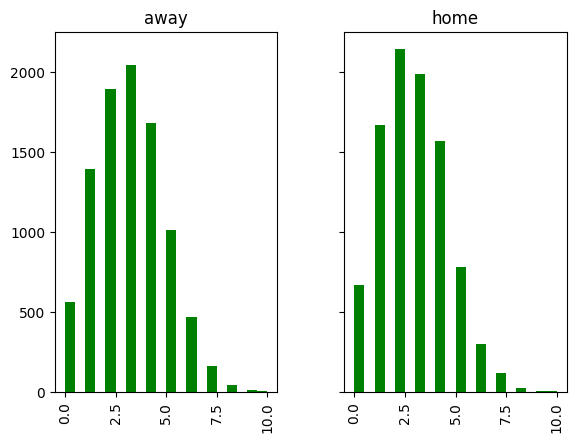

In [30]:
NHL_Game.hist(by='home_away', column='goals_against', color='green', bins=20, sharex=True, sharey=True)

20.	In the “NHL_Team_R_Stats” dataframe, make a scatter plot to depict the relationship between the total number of goals for and the winning percentage. a) Plot the total number of goals for on the x-axis and winning percentage on the y-axis. b) Add a regression line to the scatter plot. c) Make the title of the graph “Relationship between Goals for and Winning Percentage” and make the font size 11. d) Label the x-axis “Total Goals for” and label the y-axis “Winning Percentage”.

Text(0, 0.5, 'Winning Percetage')

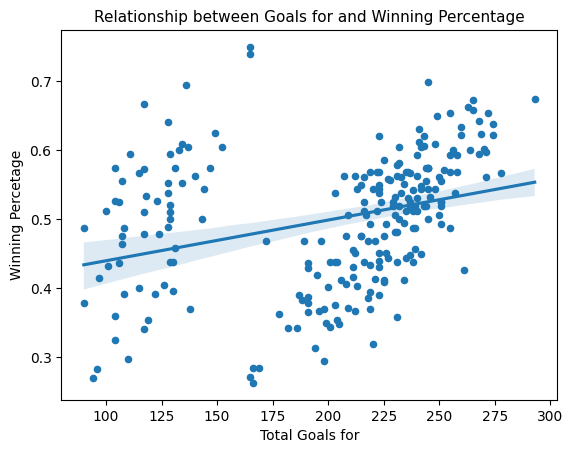

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

NHL_Team_R_Stats.plot.scatter(x='TotalGoalsFor', y='win_pct')
sns.regplot(x='TotalGoalsFor', y='win_pct', data=NHL_Team_R_Stats, marker='.')
plt.title('Relationship between Goals for and Winning Percentage', fontsize=11)
plt.xlabel('Total Goals for')
plt.ylabel('Winning Percetage')

21.	In the “NHL_Team_R_Stats” dataframe, calculate the correlation coefficient between total number of goals for and winning percentage.

In [32]:
corrGoalsWPCT = NHL_Team_R_Stats['TotalGoalsFor'].corr(NHL_Team_R_Stats['win_pct'])

Question III/1
What is the correlation coefficient between total number of goals for and winning percentage from step 2?

A.	0.619
B.	0.316
C.	0.749
D.	0.408


In [33]:
print(corrGoalsWPCT)

0.31566456280848176


22.	Create a scatter plot of the total number of goals for and winning percentage similar to step 1 for regular season games. In this graph, group observations by “competition_name”. a) Plot the total number of goals for on the x-axis and winning percentage on the y-axis. b) Add a regression line to the scatter plot. c) Make the title of the graph “Relationship between Goals for and Winning Percentage” and make the font size 11. d) Label the x-axis “Total Goals for” and label the y-axis “Winning Percentage”.

Text(59.75950868055557, 0.5, 'Winning Percentage')

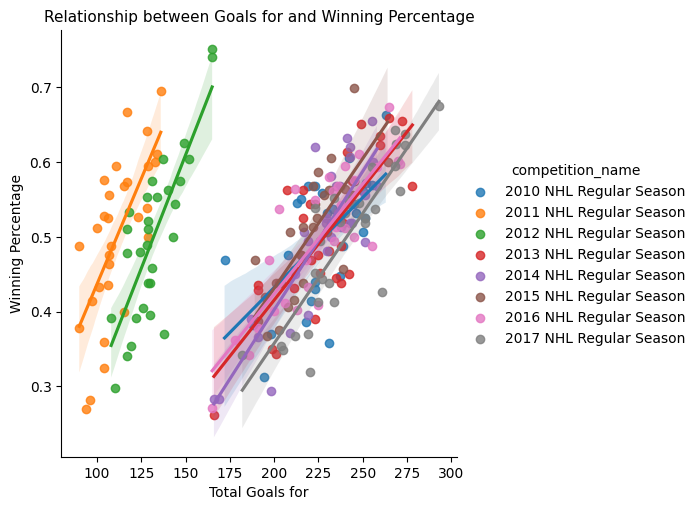

In [34]:
NHL_Team_R_Stats_Grouped = NHL_Team_R_Stats #.groupby('competition_name')['TotalGoalsFor', 'win_pct'].sum().reset_index()
#NHL_Team_R_Stats_Grouped = NHL_Team_R_Stats_Grouped.groupby(by='competition_name')['TotalGoalsFor', 'win_pct']
#NHL_Team_R_Stats_Grouped.plot.scatter(x='TotalGoalsFor', y='win_pct')
sns.lmplot(x='TotalGoalsFor', y='win_pct', data=NHL_Team_R_Stats_Grouped, hue='competition_name')
plt.title('Relationship between Goals for and Winning Percentage', fontsize=11)
plt.xlabel('Total Goals for')
plt.ylabel('Winning Percentage')

23.	For the “NHL_Team_R_Stats” dataframe, delete observations of 2011 and 2012 seasons. Continue to name the dataframe “NHL_Team_R_Stats”.

In [35]:
indexes2011 = NHL_Team_R_Stats[NHL_Team_R_Stats['year'] == 2011].index
NHL_Team_R_Stats.drop(indexes2011, inplace=True)

indexes2012 = NHL_Team_R_Stats[NHL_Team_R_Stats['year'] == 2012].index
NHL_Team_R_Stats.drop(indexes2012, inplace=True)

#NHL_Team_R_Stats

<ipython-input-35-efede00fbe97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NHL_Team_R_Stats.drop(indexes2011, inplace=True)
<ipython-input-35-efede00fbe97>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NHL_Team_R_Stats.drop(indexes2012, inplace=True)


24.	In the new “NHL_Team_R_Stats” dataframe, create a scatter plot of total number of goals for and winning percentage. a) Plot the total number of goals for on the x-axis and winning percentage on the y-axis. b) Add a regression line to the scatter plot. c) Make the title of the graph “Relationship between Goals for and Winning Percentage” and make the font size 11. d) Label the x-axis “Total Goals for” and label the y-axis “Winning Percentage”.

Text(0, 0.5, 'Winning Percentage')

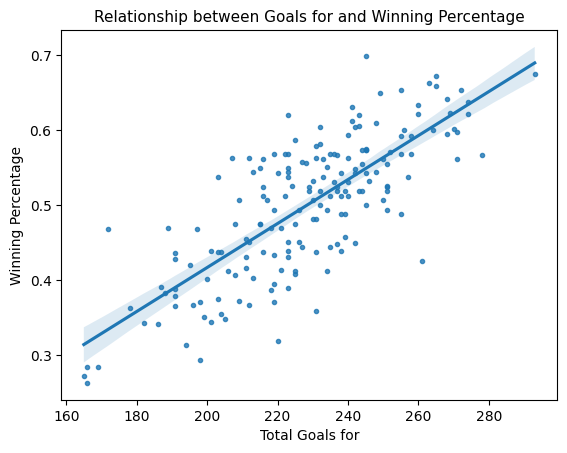

In [36]:
#NHL_Team_R_Stats.plot.scatter(x='TotalGoalsFor', y='win_pct')
sns.regplot(x='TotalGoalsFor', y='win_pct', data=NHL_Team_R_Stats, marker='.')
plt.title('Relationship between Goals for and Winning Percentage', fontsize=11)
plt.xlabel('Total Goals for')
plt.ylabel('Winning Percentage')


25.	Calculate the correlation coefficient between total number of goals for and winning percentage in the updated “NHL_Team_R_Stats” dataframe.

In [39]:
corrFiltered = NHL_Team_R_Stats['TotalGoalsFor'].corr(NHL_Team_R_Stats['win_pct'])

Question III/2
What is the correlation coefficient between total number of goals for and winning percentage in step 6?

A.	0.761
B.	0.776
C.	0.753
D.	0.771


In [40]:
print(corrFiltered)

0.7706255321801438


26.	Save dataframes as csv files. a) Name the updated “NHL_Game” dataframe as “NHL_Game2”. b) Name the “NHL_Team_Stats” dataframe as “NHL_Team_Stats”. c) Name the “NHL_Team_R_Stats” dataframe as “NHL_Team_R_Stats”. d) Make sure to exclude the index as a column in the csv files.




In [38]:
NHL_Game.to_csv('NHL_Game2.csv', index=False)
NHL_Team_Stats.to_csv('NHL_Team_Stats.csv', index=False)
NHL_Team_R_Stats.to_csv('NHL_Team_R_Stats.csv', index=False)